In [1]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import snippets as sp
reload(sp)

<module 'snippets' from '/gpfs/home/mep22dku/scratch/SOZONE/UTILS/snippets.py'>

In [3]:
def make_yearlist_AMOC(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def get_max_amoc(moc_dataset):

    atl_at_26 = np.squeeze(moc_dataset.zomsfatl.sel(y=94).values)
    tshape = np.shape(atl_at_26)
    len_ts = tshape[0]

    max_atl = np.zeros(len_ts)

    for i in range(0,len(max_atl)):
        max_atl[i] = np.nanmax(atl_at_26[i,:])
        
    return max_atl

def save_max_amoc(mod, yrst = 1920, yrend = 2023):
    
    KFD0_moc = make_yearlist_AMOC(yrst, yrend, f'TOM12_TJ_{mod}')
    KFD0_mocdat = xr.open_mfdataset(KFD0_moc)
    KFD0_max_amoc = get_max_amoc(KFD0_mocdat)
    nicetime  = KFD0_mocdat.indexes['time_counter'].to_datetimeindex()
    data_vars = {'amoc':(['time_counter'], KFD0_max_amoc,),}
    coords = {'time_counter': (['time_counter'], nicetime)}
    KFD0_max_amoc = xr.Dataset(data_vars=data_vars,coords=coords)
    KFD0_max_amoc.to_netcdf(f'./data/{mod}_max_amoc.nc')
    print(f'saved ./data/{mod}_max_amoc.nc')

In [4]:
save_max_amoc('LF50', yrst = 1750, yrend = 1945)

saved ./data/LF50_max_amoc.nc


In [5]:
save_max_amoc('HF50', yrst = 1920, yrend = 2023)

saved ./data/HF50_max_amoc.nc


In [20]:
tcol = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', \
        '#f58231', '#911eb4', '#46f0f0', '#f032e6', \
        '#bcf60c', '#fabebe', '#008080', '#e6beff', \
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

modi = {
    'KDD0': {'tcol': 'darkgrey', 'tdesc': 'SR', 'tlw': 1.5},
    'KWD0': {'tcol': 'r', 'tdesc': 'no SR', 'tlw': 1.5},
    'KFD0': {'tcol': tcol[0], 'tdesc': 'flxcorr north atl, monthly', 'tlw': 1.5},
    'KFD1': {'tcol': tcol[1], 'tdesc': 'flxcorr north atl, yearly', 'tlw': 1.5},
    'KFD2': {'tcol': tcol[2], 'tdesc': 'flxcorr global, yearly', 'tlw': 1.5},
    'KFD3': {'tcol': tcol[3], 'tdesc': 'flxcorr global, monthly', 'tlw': 1.5},
    'KFD4': {'tcol': tcol[4], 'tdesc': 'flxcorr global, monthly2x', 'tlw': 1.5},
    'KFD5': {'tcol': tcol[5], 'tdesc': 'flxcorr global, monthly5x', 'tlw': 1.5},
    'KFD6': {'tcol': tcol[6], 'tdesc': 'flxcorr global, monthly10x', 'tlw': 1.5},
    'KFD7': {'tcol': tcol[7], 'tdesc': 'flxcorr glob, monthly, pos only', 'tlw': 1.5},
    'KDD1': {'tcol': tcol[8], 'tdesc': 'SR, 2x rn_deds', 'tlw': 1.5},
    'KDD2': {'tcol': tcol[9], 'tdesc': 'SR, 0.1 rn_deds', 'tlw': 1.5},
    'KDD3': {'tcol': tcol[10], 'tdesc': 'SR, 4x rn_deds', 'tlw': 1.5},
    'KCW0': {'tcol': tcol[11], 'tdesc': 'no TR no SR', 'tlw': 1.5},
    'KCD0': {'tcol': tcol[12], 'tdesc': 'no TR yes SR', 'tlw': 1.5},
    'DF50': {'tcol': tcol[16], 'tdesc': 'flxcorr global, monthly5x (rerun)', 'tlw': 1.5},
    'HF50': {'tcol': tcol[14], 'tdesc': 'flxcorr global, monthly5x, with hosing', 'tlw': 1.5},
    'LF50': {'tcol': tcol[15], 'tdesc': 'flxcorr global, monthly5x, long spinup', 'tlw': 1.5},
}
    
runs = ['KWD0','KDD0','KFD0','KFD1','KFD2',\
        'KFD3','KFD4','KFD5','KFD6','KDD1',\
        'KDD2','KFD7','KDD3','KCW0','KCD0']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


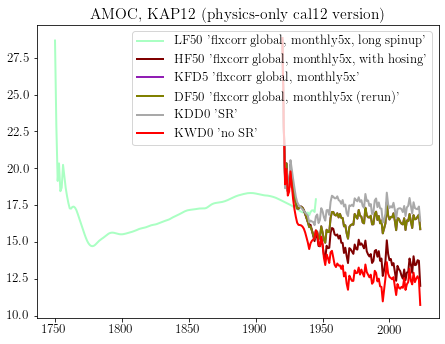

In [21]:
runs = ['LF50','HF50','KFD5', 'DF50','KDD0','KWD0']
#runs = ['DF50']
#,'KFD0','KFD1','KFD2',\
        # 'KFD3','KFD4','KFD5','KFD6','KDD1',\
        # 'KDD2','KFD7','KDD3','KCW0','KCD0']

fact = 0.9
fig, axs = plt.subplots(1,1, figsize=(8*fact, 6*fact), facecolor='w', edgecolor='k')


axs.set_title('AMOC, KAP12 (physics-only cal12 version)')
axs.legend()

for m in runs:
    try:
        w = xr.open_dataset(f'./data/{m}_max_amoc.nc')
        w1 = w.groupby('time_counter.year').mean()    
        desc = {modi[m]['tdesc']}
        axs.plot(w1.year,w1.amoc, lw = 2, color = modi[m]['tcol'], label = f'{m} {desc}')
        
    except:
        print(f'no {m}')
             
axs.legend()
# yrly_moc = am.groupby('time.year').mean() 
# axs.plot(yrly_moc.year, yrly_moc.moc_mar_hc10, 'k-', lw = 2, label = 'yearly OT, RAPID')
# axs.legend(bbox_to_anchor = [1,1])